Let's add motion blur to an image.

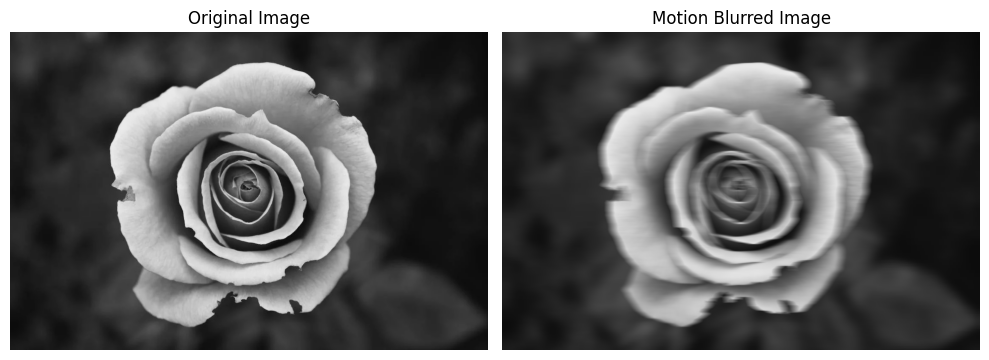

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

notebook_dir = os.path.dirname(os.path.abspath('__file__'))
image_filename = 'image_2.jpeg'
image_path = os.path.join(notebook_dir, 'images', image_filename)

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel_size = 25 
motion_blur_kernel = np.zeros((kernel_size, kernel_size))
motion_blur_kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
motion_blur_kernel /= kernel_size

blurred_image = cv2.filter2D(image_rgb, -1, motion_blur_kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(blurred_image)
axes[1].set_title('Motion Blurred Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


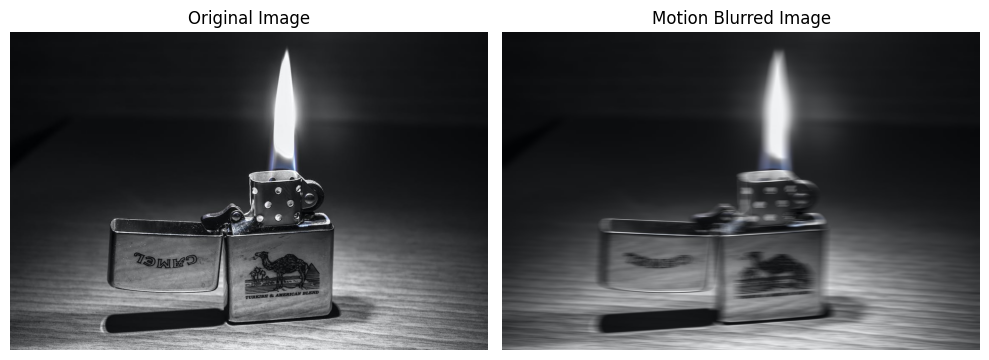

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

notebook_dir = os.path.dirname(os.path.abspath('__file__'))
image_filename = 'image_5.jpeg'
image_path = os.path.join(notebook_dir, 'images', image_filename)

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel_size = 25 
motion_blur_kernel = np.zeros((kernel_size, kernel_size))
motion_blur_kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
motion_blur_kernel /= kernel_size

blurred_image = cv2.filter2D(image_rgb, -1, motion_blur_kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(blurred_image)
axes[1].set_title('Motion Blurred Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


Let's use Weiner filter to restore the blurred image.

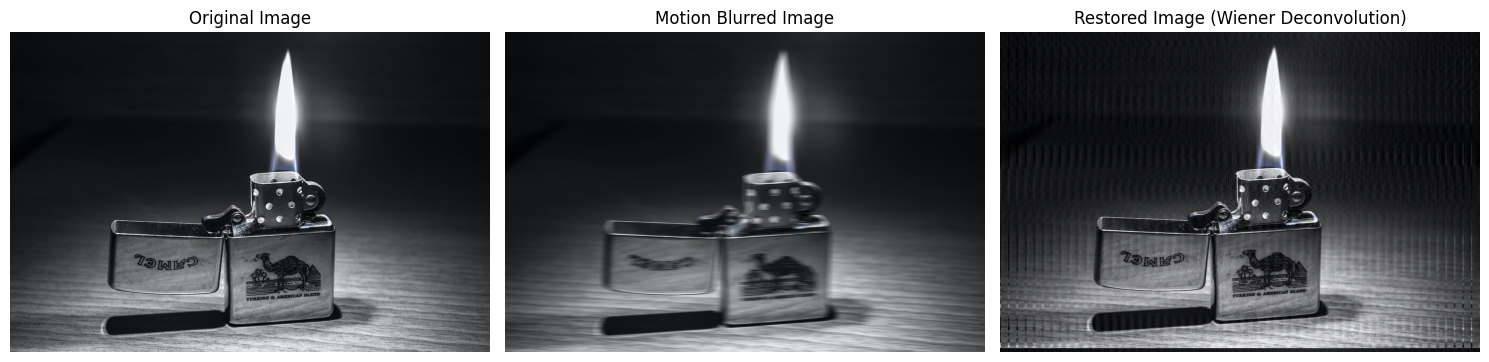

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image
import os

notebook_dir = os.path.dirname(os.path.abspath('__file__'))
image_filename = 'image_5.jpeg'
image_path = os.path.join(notebook_dir, 'images', image_filename)

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel_size = 20
motion_blur_kernel = np.zeros((kernel_size, kernel_size, image_rgb.shape[2]))
motion_blur_kernel[int((kernel_size - 1) / 2), :, :] = np.ones((kernel_size, image_rgb.shape[2]))
motion_blur_kernel /= kernel_size

blurred_image = cv2.filter2D(image_rgb, -1, motion_blur_kernel)

kernel_fft = np.fft.fft2(motion_blur_kernel, s=image_rgb.shape[:2], axes=(0, 1))
blurred_fft = np.fft.fft2(blurred_image, axes=(0, 1))

blurred_psd = np.abs(blurred_fft) ** 2

noise_psd = np.mean(np.abs(blurred_fft) ** 2) / np.prod(image_rgb.shape[:2])

reg_param = 0.1  
wiener_filter = np.conj(kernel_fft) / (np.abs(kernel_fft) ** 2 + reg_param * noise_psd / blurred_psd)
restored_fft = blurred_fft * wiener_filter
restored_image = np.fft.ifft2(restored_fft, axes=(0, 1)).real

restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(blurred_image)
axes[1].set_title('Motion Blurred Image')
axes[1].axis('off')
axes[2].imshow(restored_image)
axes[2].set_title('Restored Image (Wiener Deconvolution)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


Let's try deconvoluting the image using Weiner filter without previous information about the source of motion blur, and test out different kernel sizes.

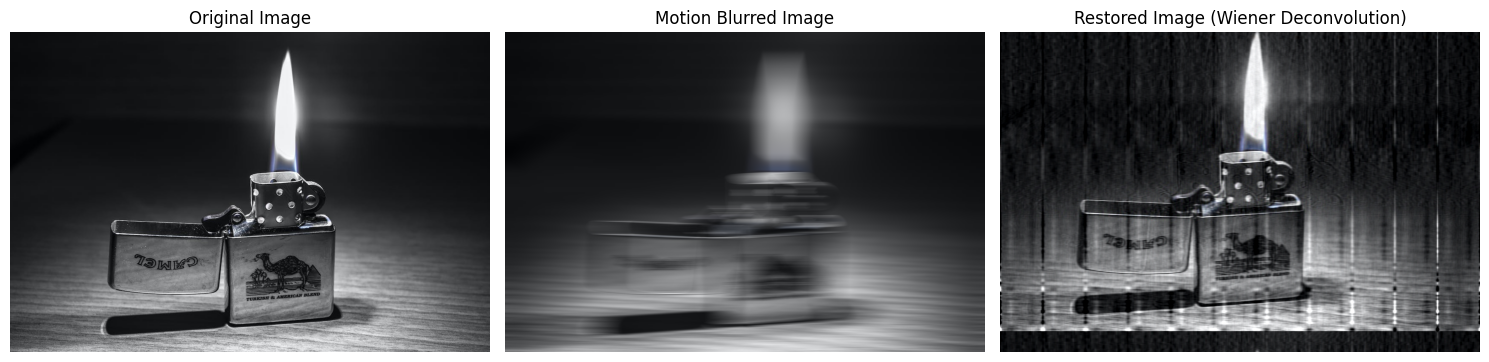

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image
import os

notebook_dir = os.path.dirname(os.path.abspath('__file__'))
image_filename = 'image_5.jpeg'
image_path = os.path.join(notebook_dir, 'images', image_filename)

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel_size = 100
motion_blur_kernel = np.zeros((kernel_size, kernel_size, image_rgb.shape[2]))
motion_blur_kernel[int((kernel_size - 1) / 2), :, :] = np.ones((kernel_size, image_rgb.shape[2]))
motion_blur_kernel /= kernel_size

blurred_image = cv2.filter2D(image_rgb, -1, motion_blur_kernel)

kernel_size2 = 100
motion_blur_kernel2 = np.zeros((kernel_size2, kernel_size2, image_rgb.shape[2]))
motion_blur_kernel2[int((kernel_size2 - 1) / 2), :, :] = np.ones((kernel_size2, image_rgb.shape[2]))
motion_blur_kernel2 /= kernel_size2
kernel_fft = np.fft.fft2(motion_blur_kernel2, s=image_rgb.shape[:2], axes=(0, 1))
blurred_fft = np.fft.fft2(blurred_image, axes=(0, 1))

blurred_psd = np.abs(blurred_fft) ** 2

noise_psd = np.mean(np.abs(blurred_fft) ** 2) / np.prod(image_rgb.shape[:2])

reg_param = 0.1  
wiener_filter = np.conj(kernel_fft) / (np.abs(kernel_fft) ** 2 + reg_param * noise_psd / blurred_psd)
restored_fft = blurred_fft * wiener_filter
restored_image = np.fft.ifft2(restored_fft, axes=(0, 1)).real

restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(blurred_image)
axes[1].set_title('Motion Blurred Image')
axes[1].axis('off')
axes[2].imshow(restored_image)
axes[2].set_title('Restored Image (Wiener Deconvolution)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


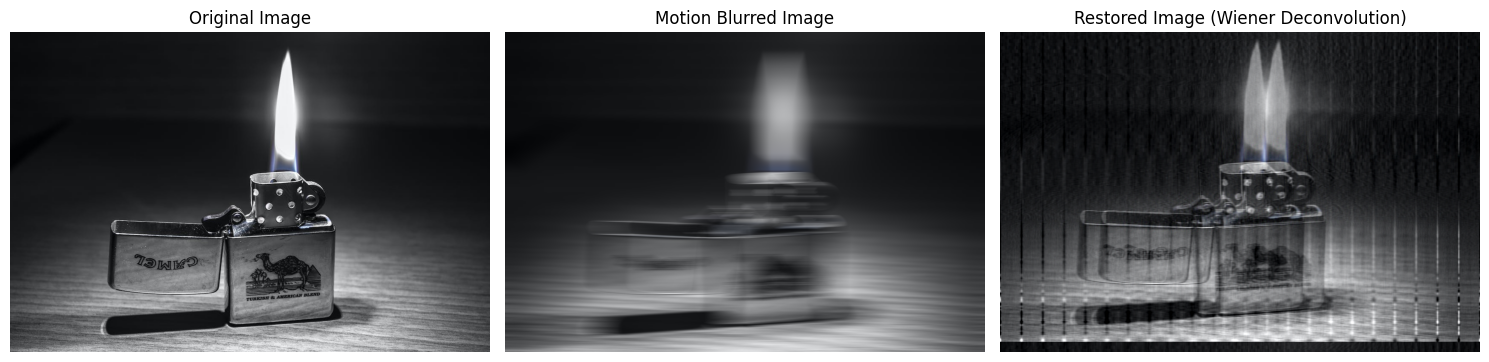

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image
import os

notebook_dir = os.path.dirname(os.path.abspath('__file__'))
image_filename = 'image_5.jpeg'
image_path = os.path.join(notebook_dir, 'images', image_filename)

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel_size = 100
motion_blur_kernel = np.zeros((kernel_size, kernel_size, image_rgb.shape[2]))
motion_blur_kernel[int((kernel_size - 1) / 2), :, :] = np.ones((kernel_size, image_rgb.shape[2]))
motion_blur_kernel /= kernel_size

blurred_image = cv2.filter2D(image_rgb, -1, motion_blur_kernel)

kernel_size2 = 50
motion_blur_kernel2 = np.zeros((kernel_size2, kernel_size2, image_rgb.shape[2]))
motion_blur_kernel2[int((kernel_size2 - 1) / 2), :, :] = np.ones((kernel_size2, image_rgb.shape[2]))
motion_blur_kernel2 /= kernel_size2
kernel_fft = np.fft.fft2(motion_blur_kernel2, s=image_rgb.shape[:2], axes=(0, 1))
blurred_fft = np.fft.fft2(blurred_image, axes=(0, 1))

blurred_psd = np.abs(blurred_fft) ** 2

noise_psd = np.mean(np.abs(blurred_fft) ** 2) / np.prod(image_rgb.shape[:2])

reg_param = 0.1  
wiener_filter = np.conj(kernel_fft) / (np.abs(kernel_fft) ** 2 + reg_param * noise_psd / blurred_psd)
restored_fft = blurred_fft * wiener_filter
restored_image = np.fft.ifft2(restored_fft, axes=(0, 1)).real

restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(blurred_image)
axes[1].set_title('Motion Blurred Image')
axes[1].axis('off')
axes[2].imshow(restored_image)
axes[2].set_title('Restored Image (Wiener Deconvolution)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


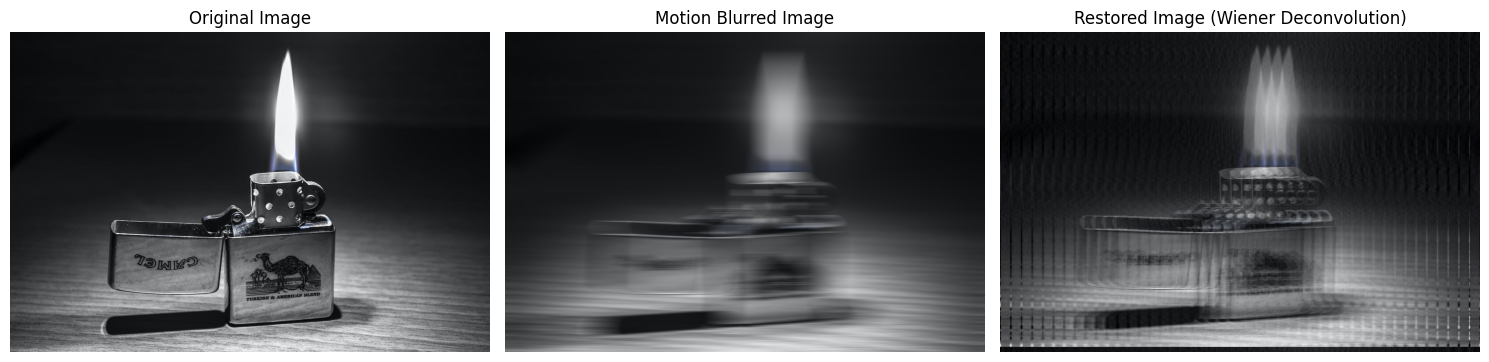

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image
import os

notebook_dir = os.path.dirname(os.path.abspath('__file__'))
image_filename = 'image_5.jpeg'
image_path = os.path.join(notebook_dir, 'images', image_filename)

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel_size = 100
motion_blur_kernel = np.zeros((kernel_size, kernel_size, image_rgb.shape[2]))
motion_blur_kernel[int((kernel_size - 1) / 2), :, :] = np.ones((kernel_size, image_rgb.shape[2]))
motion_blur_kernel /= kernel_size

blurred_image = cv2.filter2D(image_rgb, -1, motion_blur_kernel)

kernel_size2 = 25
motion_blur_kernel2 = np.zeros((kernel_size2, kernel_size2, image_rgb.shape[2]))
motion_blur_kernel2[int((kernel_size2 - 1) / 2), :, :] = np.ones((kernel_size2, image_rgb.shape[2]))
motion_blur_kernel2 /= kernel_size2
kernel_fft = np.fft.fft2(motion_blur_kernel2, s=image_rgb.shape[:2], axes=(0, 1))
blurred_fft = np.fft.fft2(blurred_image, axes=(0, 1))

blurred_psd = np.abs(blurred_fft) ** 2

noise_psd = np.mean(np.abs(blurred_fft) ** 2) / np.prod(image_rgb.shape[:2])

reg_param = 0.1  
wiener_filter = np.conj(kernel_fft) / (np.abs(kernel_fft) ** 2 + reg_param * noise_psd / blurred_psd)
restored_fft = blurred_fft * wiener_filter
restored_image = np.fft.ifft2(restored_fft, axes=(0, 1)).real

restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(blurred_image)
axes[1].set_title('Motion Blurred Image')
axes[1].axis('off')
axes[2].imshow(restored_image)
axes[2].set_title('Restored Image (Wiener Deconvolution)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


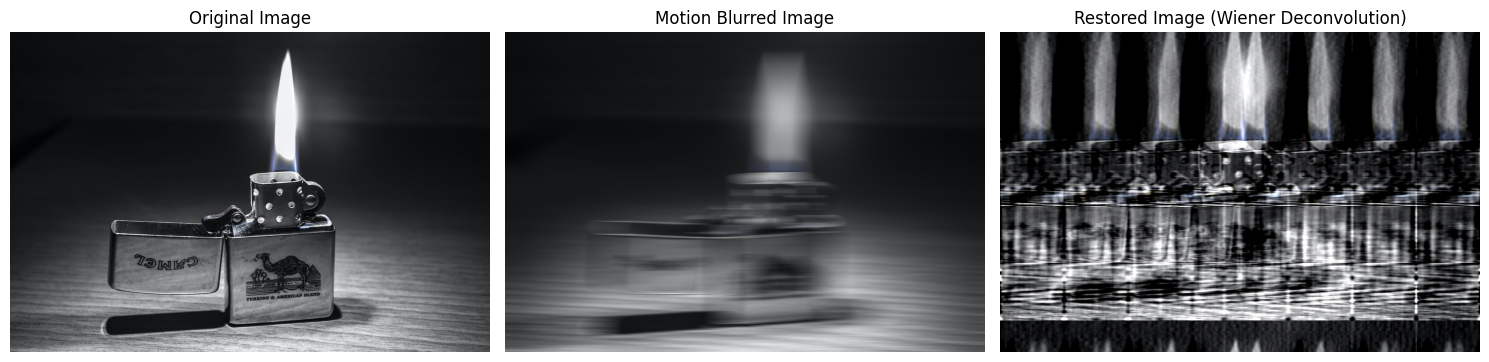

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image
import os

notebook_dir = os.path.dirname(os.path.abspath('__file__'))
image_filename = 'image_5.jpeg'
image_path = os.path.join(notebook_dir, 'images', image_filename)

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel_size = 100
motion_blur_kernel = np.zeros((kernel_size, kernel_size, image_rgb.shape[2]))
motion_blur_kernel[int((kernel_size - 1) / 2), :, :] = np.ones((kernel_size, image_rgb.shape[2]))
motion_blur_kernel /= kernel_size

blurred_image = cv2.filter2D(image_rgb, -1, motion_blur_kernel)

kernel_size2 = 150
motion_blur_kernel2 = np.zeros((kernel_size2, kernel_size2, image_rgb.shape[2]))
motion_blur_kernel2[int((kernel_size2 - 1) / 2), :, :] = np.ones((kernel_size2, image_rgb.shape[2]))
motion_blur_kernel2 /= kernel_size2
kernel_fft = np.fft.fft2(motion_blur_kernel2, s=image_rgb.shape[:2], axes=(0, 1))
blurred_fft = np.fft.fft2(blurred_image, axes=(0, 1))

blurred_psd = np.abs(blurred_fft) ** 2

noise_psd = np.mean(np.abs(blurred_fft) ** 2) / np.prod(image_rgb.shape[:2])

reg_param = 0.1  
wiener_filter = np.conj(kernel_fft) / (np.abs(kernel_fft) ** 2 + reg_param * noise_psd / blurred_psd)
restored_fft = blurred_fft * wiener_filter
restored_image = np.fft.ifft2(restored_fft, axes=(0, 1)).real

restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(blurred_image)
axes[1].set_title('Motion Blurred Image')
axes[1].axis('off')
axes[2].imshow(restored_image)
axes[2].set_title('Restored Image (Wiener Deconvolution)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


Let's check the impact of the parameter lambda.

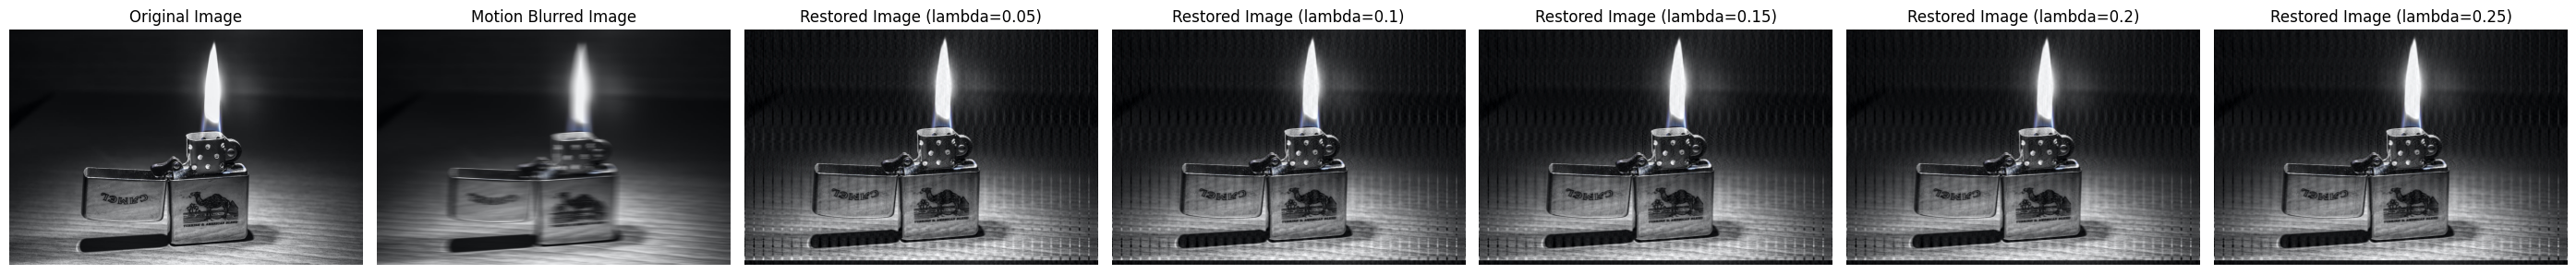

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image
import os

notebook_dir = os.path.dirname(os.path.abspath('__file__'))
image_filename = 'image_5.jpeg'
image_path = os.path.join(notebook_dir, 'images', image_filename)

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel_size = 30
motion_blur_kernel = np.zeros((kernel_size, kernel_size, image_rgb.shape[2]))
motion_blur_kernel[int((kernel_size - 1) / 2), :, :] = np.ones((kernel_size, image_rgb.shape[2]))
motion_blur_kernel /= kernel_size

blurred_image = cv2.filter2D(image_rgb, -1, motion_blur_kernel)

kernel_fft = np.fft.fft2(motion_blur_kernel, s=image_rgb.shape[:2], axes=(0, 1))
blurred_fft = np.fft.fft2(blurred_image, axes=(0, 1))

blurred_psd = np.abs(blurred_fft) ** 2

noise_psd = np.mean(np.abs(blurred_fft) ** 2) / np.prod(image_rgb.shape[:2])

lambdas = [0.05, 0.1, 0.15, 0.2, 0.25]

fig, axes = plt.subplots(1, len(lambdas)+2, figsize=(4*(len(lambdas)+2), 4))

axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(blurred_image)
axes[1].set_title('Motion Blurred Image')
axes[1].axis('off')

for i, lambd in enumerate(lambdas):
    reg_param = lambd
    wiener_filter = np.conj(kernel_fft) / (np.abs(kernel_fft) ** 2 + reg_param * noise_psd / blurred_psd)
    restored_fft = blurred_fft * wiener_filter
    restored_image = np.fft.ifft2(restored_fft, axes=(0, 1)).real

    restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)
    
    axes[i+2].imshow(restored_image)
    axes[i+2].set_title(f'Restored Image (lambda={lambd})')
    axes[i+2].axis('off')

plt.tight_layout()
plt.show()


Applying inverse filter without cutting off enough high frequency signals...

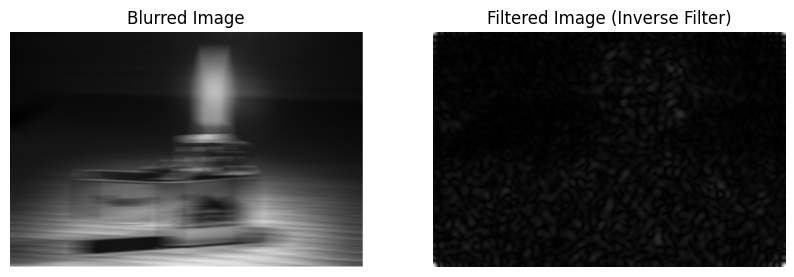

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

notebook_dir = os.path.dirname(os.path.abspath('__file__'))

image_filename = 'image_13_blur.jpeg'
image_path = os.path.join(notebook_dir, 'images', image_filename)
image = Image.open(image_path).convert('L')
image_array = np.array(image)

dft = np.fft.fft2(image_array)

dft_shifted = np.fft.fftshift(dft)

mask = np.zeros_like(dft_shifted, dtype=np.float64)
mask[int(dft_shifted.shape[0] / 2) - int(dft_shifted.shape[0] * 0.6) : int(dft_shifted.shape[0] / 2) + int(dft_shifted.shape[0] * 0.6),
     int(dft_shifted.shape[1] / 2) - int(dft_shifted.shape[1] * 0.6) : int(dft_shifted.shape[1] / 2) + int(dft_shifted.shape[1] * 0.6)] = 1

dft_shifted_filtered = dft_shifted * mask

filtered_image_array = np.abs(np.fft.ifft2(np.fft.ifftshift(dft_shifted_filtered)))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image_array, cmap='gray')
axes[0].set_title('Blurred Image')
axes[0].axis('off')

axes[1].imshow(filtered_image_array, cmap='gray')
axes[1].set_title('Filtered Image (Inverse Filter)')
axes[1].axis('off')

plt.show()


By cutting off a bit more, we get a better result.

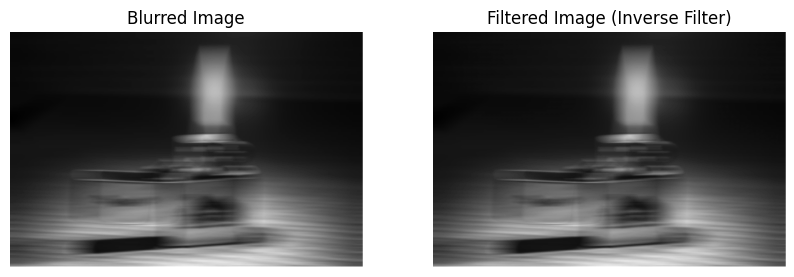

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

notebook_dir = os.path.dirname(os.path.abspath('__file__'))

image_filename = 'image_13_blur.jpeg'
image_path = os.path.join(notebook_dir, 'images', image_filename)
image = Image.open(image_path).convert('L')
image_array = np.array(image)

dft = np.fft.fft2(image_array)

dft_shifted = np.fft.fftshift(dft)

mask = np.zeros_like(dft_shifted, dtype=np.float64)
mask[int(dft_shifted.shape[0] / 2) - int(dft_shifted.shape[0] * 0.5) : int(dft_shifted.shape[0] / 2) + int(dft_shifted.shape[0] * 0.5),
     int(dft_shifted.shape[1] / 2) - int(dft_shifted.shape[1] * 0.5) : int(dft_shifted.shape[1] / 2) + int(dft_shifted.shape[1] * 0.5)] = 1

dft_shifted_filtered = dft_shifted * mask

filtered_image_array = np.abs(np.fft.ifft2(np.fft.ifftshift(dft_shifted_filtered)))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image_array, cmap='gray')
axes[0].set_title('Blurred Image')
axes[0].axis('off')

axes[1].imshow(filtered_image_array, cmap='gray')
axes[1].set_title('Filtered Image (Inverse Filter)')
axes[1].axis('off')

plt.show()


Trying another approach for Wiener filter, on an example from the Exercise...

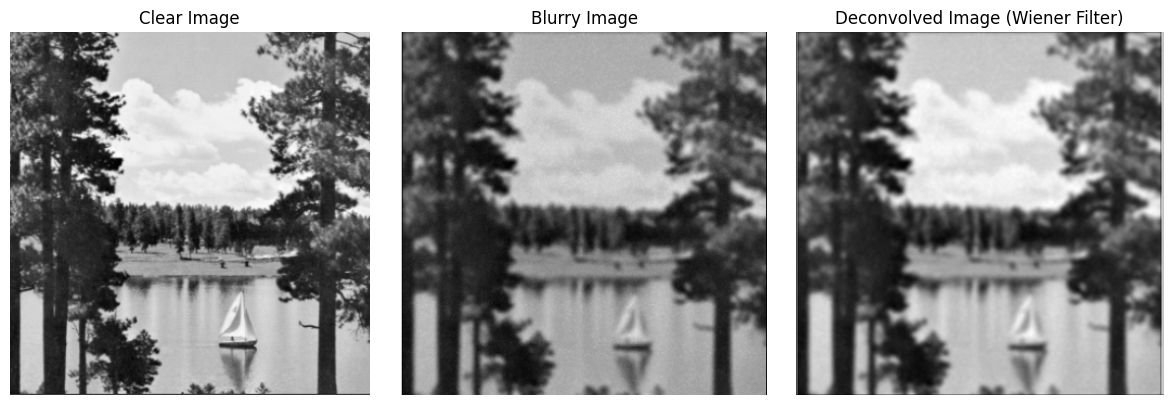

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from scipy.signal import wiener

notebook_dir = os.path.dirname(os.path.abspath('__file__'))

clear_image_filename = 'image_12_clear.jpeg'
blurry_image_filename = 'image_12_blurry.jpeg'
clear_image_path = os.path.join(notebook_dir, 'images', clear_image_filename)
blurry_image_path = os.path.join(notebook_dir, 'images', blurry_image_filename)

clear_image = Image.open(clear_image_path).convert('L')
blurry_image = Image.open(blurry_image_path).convert('L')

clear_image_array = np.array(clear_image)
blurry_image_array = np.array(blurry_image)

noise_power = np.var(blurry_image_array)

deconvolved_image_array = wiener(blurry_image_array, mysize=(3, 3), noise=noise_power/0.05)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(clear_image_array, cmap='gray')
axes[0].set_title('Clear Image')
axes[0].axis('off')
axes[1].imshow(blurry_image_array, cmap='gray')
axes[1].set_title('Blurry Image')
axes[1].axis('off')
axes[2].imshow(deconvolved_image_array, cmap='gray')
axes[2].set_title('Deconvolved Image (Wiener Filter)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


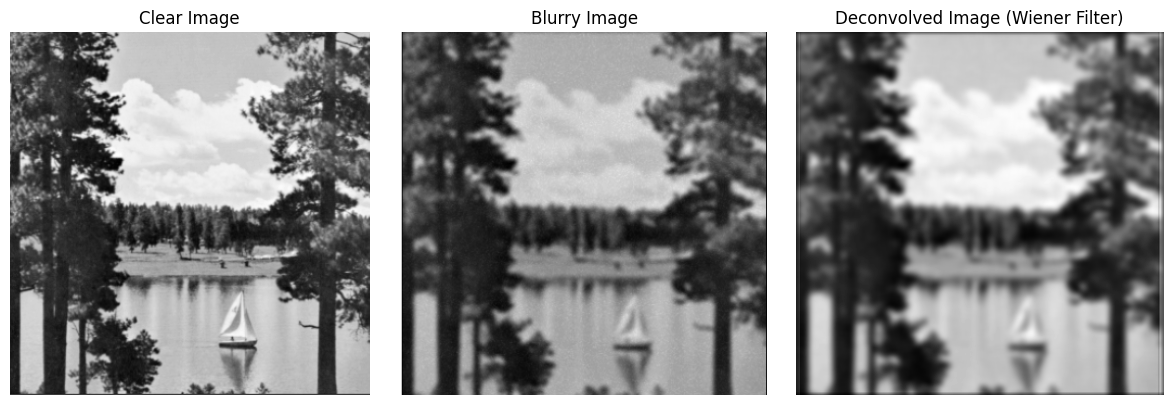

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from scipy.signal import wiener

notebook_dir = os.path.dirname(os.path.abspath('__file__'))

clear_image_filename = 'image_12_clear.jpeg'
blurry_image_filename = 'image_12_blurry.jpeg'
clear_image_path = os.path.join(notebook_dir, 'images', clear_image_filename)
blurry_image_path = os.path.join(notebook_dir, 'images', blurry_image_filename)

clear_image = Image.open(clear_image_path).convert('L')
blurry_image = Image.open(blurry_image_path).convert('L')

clear_image_array = np.array(clear_image)
blurry_image_array = np.array(blurry_image)

noise_power = np.var(blurry_image_array)

deconvolved_image_array = wiener(blurry_image_array, mysize=(7, 7), noise=noise_power/0.05)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(clear_image_array, cmap='gray')
axes[0].set_title('Clear Image')
axes[0].axis('off')
axes[1].imshow(blurry_image_array, cmap='gray')
axes[1].set_title('Blurry Image')
axes[1].axis('off')
axes[2].imshow(deconvolved_image_array, cmap='gray')
axes[2].set_title('Deconvolved Image (Wiener Filter)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


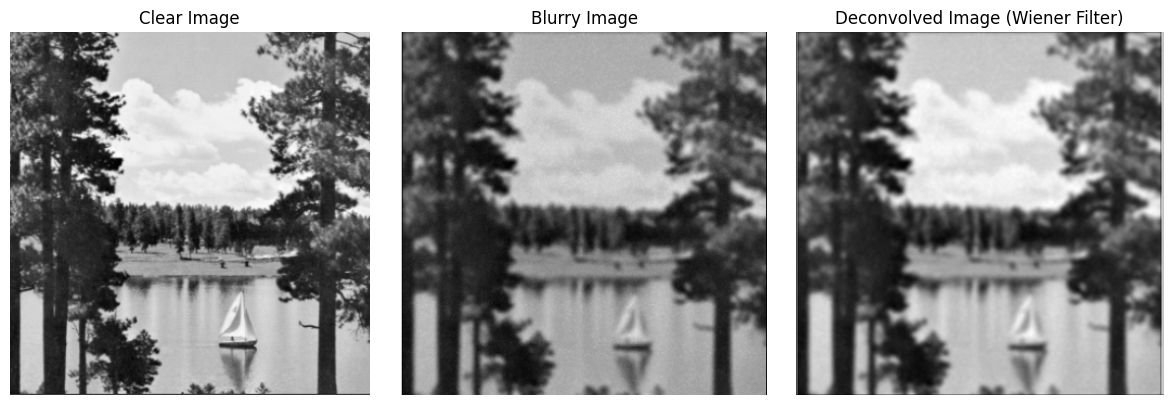

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from scipy.signal import wiener

notebook_dir = os.path.dirname(os.path.abspath('__file__'))

clear_image_filename = 'image_12_clear.jpeg'
blurry_image_filename = 'image_12_blurry.jpeg'
clear_image_path = os.path.join(notebook_dir, 'images', clear_image_filename)
blurry_image_path = os.path.join(notebook_dir, 'images', blurry_image_filename)

clear_image = Image.open(clear_image_path).convert('L')
blurry_image = Image.open(blurry_image_path).convert('L')

clear_image_array = np.array(clear_image)
blurry_image_array = np.array(blurry_image)

noise_power = np.var(blurry_image_array)

deconvolved_image_array = wiener(blurry_image_array, mysize=(3, 3), noise=noise_power/0.25)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(clear_image_array, cmap='gray')
axes[0].set_title('Clear Image')
axes[0].axis('off')
axes[1].imshow(blurry_image_array, cmap='gray')
axes[1].set_title('Blurry Image')
axes[1].axis('off')
axes[2].imshow(deconvolved_image_array, cmap='gray')
axes[2].set_title('Deconvolved Image (Wiener Filter)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


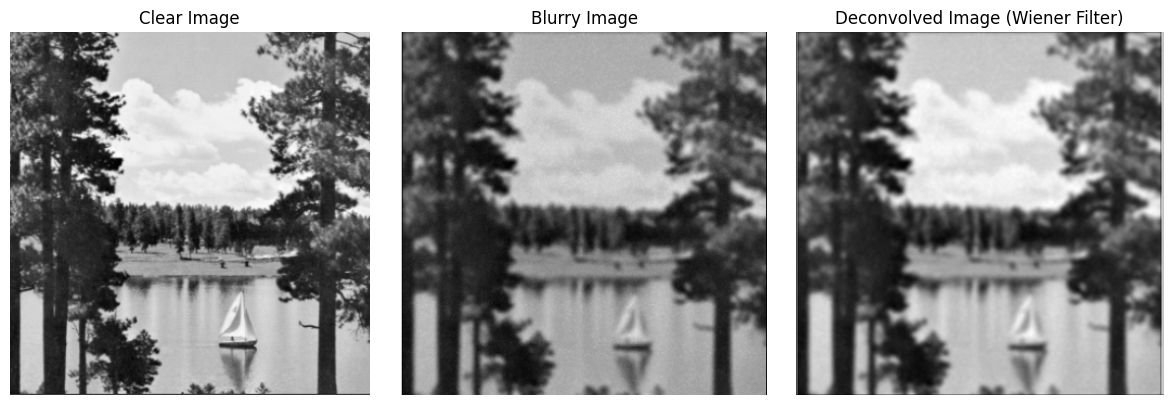

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from scipy.signal import wiener

notebook_dir = os.path.dirname(os.path.abspath('__file__'))

clear_image_filename = 'image_12_clear.jpeg'
blurry_image_filename = 'image_12_blurry.jpeg'
clear_image_path = os.path.join(notebook_dir, 'images', clear_image_filename)
blurry_image_path = os.path.join(notebook_dir, 'images', blurry_image_filename)

clear_image = Image.open(clear_image_path).convert('L')
blurry_image = Image.open(blurry_image_path).convert('L')

clear_image_array = np.array(clear_image)
blurry_image_array = np.array(blurry_image)

noise_power = np.var(blurry_image_array)

deconvolved_image_array = wiener(blurry_image_array, mysize=(3, 3), noise=noise_power/7)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(clear_image_array, cmap='gray')
axes[0].set_title('Clear Image')
axes[0].axis('off')
axes[1].imshow(blurry_image_array, cmap='gray')
axes[1].set_title('Blurry Image')
axes[1].axis('off')
axes[2].imshow(deconvolved_image_array, cmap='gray')
axes[2].set_title('Deconvolved Image (Wiener Filter)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

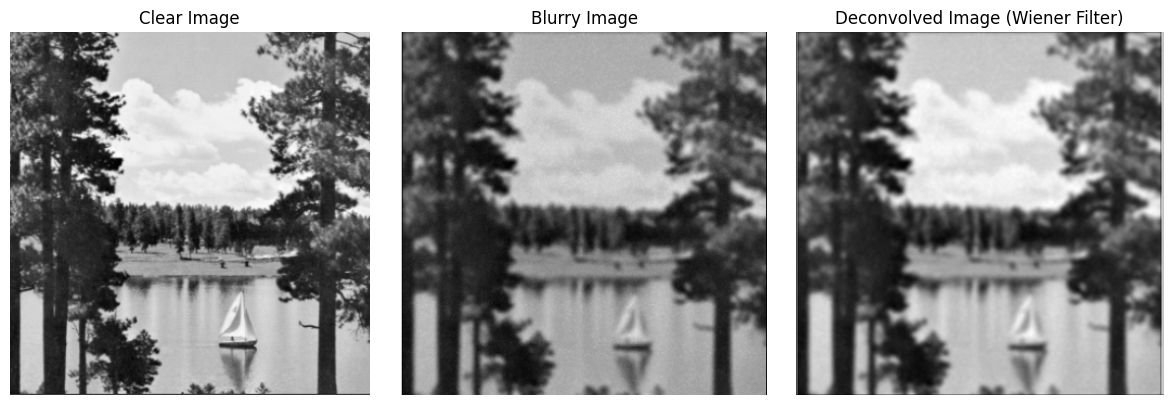

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from scipy.signal import wiener

notebook_dir = os.path.dirname(os.path.abspath('__file__'))

clear_image_filename = 'image_12_clear.jpeg'
blurry_image_filename = 'image_12_blurry.jpeg'
clear_image_path = os.path.join(notebook_dir, 'images', clear_image_filename)
blurry_image_path = os.path.join(notebook_dir, 'images', blurry_image_filename)

clear_image = Image.open(clear_image_path).convert('L')
blurry_image = Image.open(blurry_image_path).convert('L')

clear_image_array = np.array(clear_image)
blurry_image_array = np.array(blurry_image)

noise_power = np.var(blurry_image_array)

deconvolved_image_array = wiener(blurry_image_array, mysize=(3, 3), noise=noise_power/20)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(clear_image_array, cmap='gray')
axes[0].set_title('Clear Image')
axes[0].axis('off')
axes[1].imshow(blurry_image_array, cmap='gray')
axes[1].set_title('Blurry Image')
axes[1].axis('off')
axes[2].imshow(deconvolved_image_array, cmap='gray')
axes[2].set_title('Deconvolved Image (Wiener Filter)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


Some colors can be restored, but the details not so much.

Let's compare that with the old method.

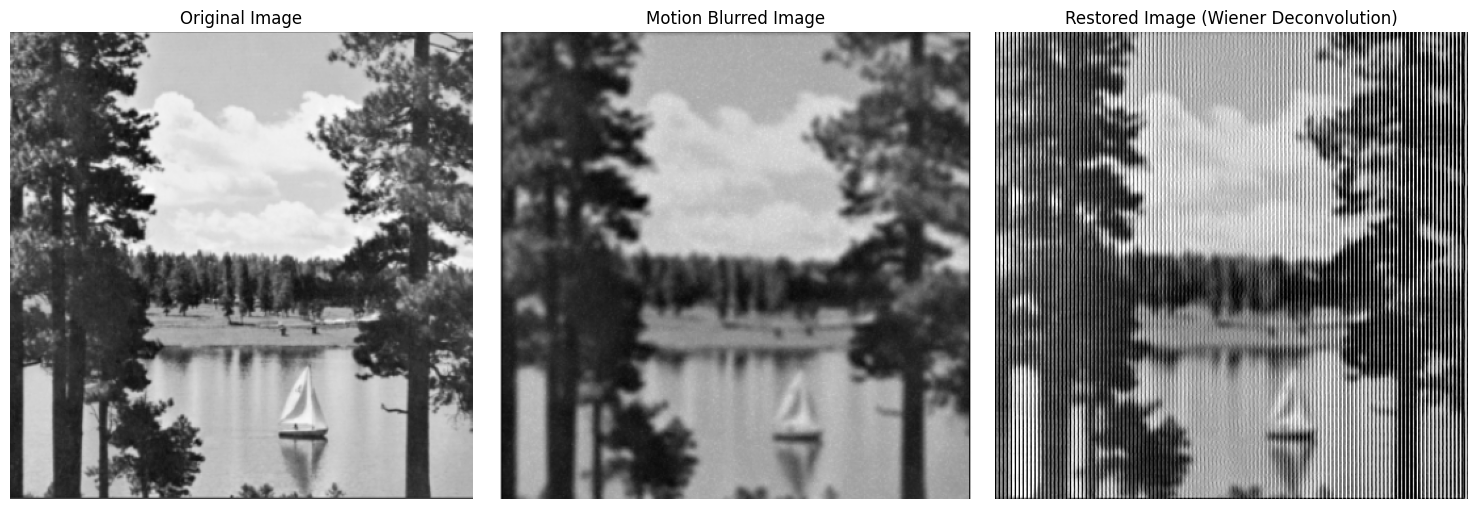

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from scipy.signal import wiener

notebook_dir = os.path.dirname(os.path.abspath('__file__'))

clear_image_filename = 'image_12_clear.jpeg'
blurry_image_filename = 'image_12_blurry.jpeg'

clear_image_path = os.path.join(notebook_dir, 'images', clear_image_filename)
clear_image = Image.open(clear_image_path)

blurry_image_path = os.path.join(notebook_dir, 'images', blurry_image_filename)
blurry_image = Image.open(blurry_image_path)

clear_image_array = np.array(clear_image)
blurry_image_array = np.array(blurry_image)

kernel_size2 = 3
motion_blur_kernel2 = np.zeros((kernel_size2, kernel_size2, blurry_image_array.shape[2]))
motion_blur_kernel2[int((kernel_size2 - 1) / 2), :, :] = np.ones((kernel_size2, blurry_image_array.shape[2]))
motion_blur_kernel2 /= kernel_size2

kernel_fft = np.fft.fft2(motion_blur_kernel2, s=blurry_image_array.shape[:2], axes=(0, 1))
blurred_fft = np.fft.fft2(blurry_image_array, axes=(0, 1))

blurred_psd = np.abs(blurred_fft) ** 2

noise_psd = np.mean(np.abs(blurred_fft) ** 2) / np.prod(blurry_image_array.shape[:2])

reg_param = 0.1
wiener_filter = np.conj(kernel_fft) / (np.abs(kernel_fft) ** 2 + reg_param * noise_psd / blurred_psd)

restored_fft = blurred_fft * wiener_filter
restored_image_array = np.fft.ifft2(restored_fft, axes=(0, 1)).real

restored_image_array = np.clip(restored_image_array, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(clear_image_array)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(blurry_image_array)
axes[1].set_title('Motion Blurred Image')
axes[1].axis('off')
axes[2].imshow(restored_image_array)
axes[2].set_title('Restored Image (Wiener Deconvolution)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


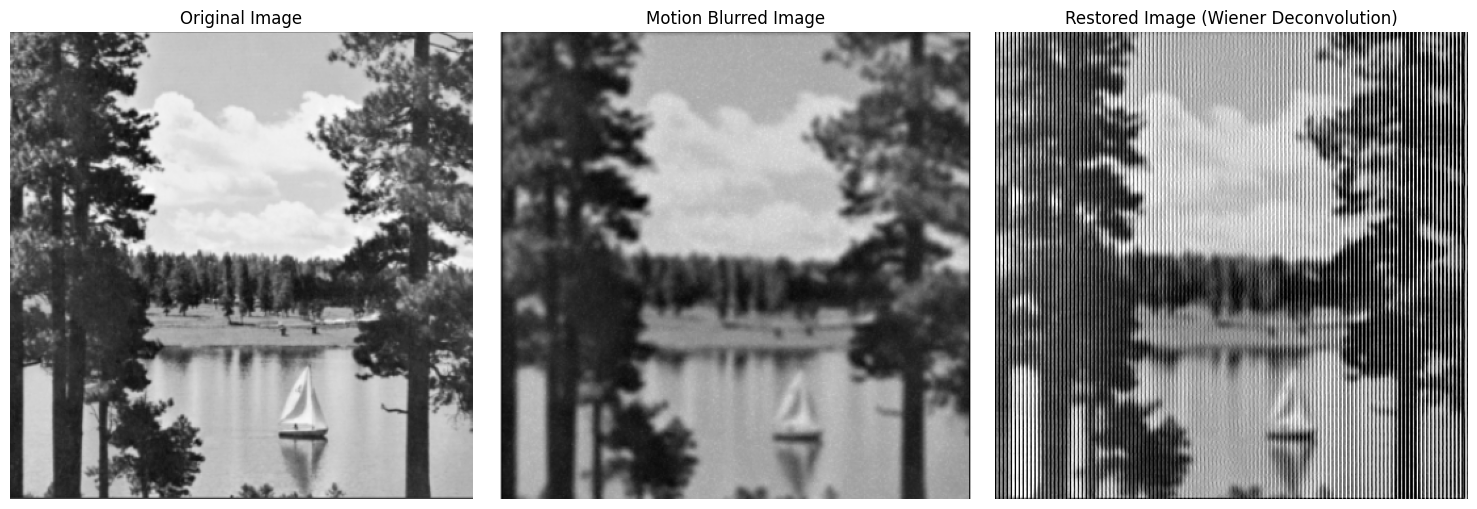

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from scipy.signal import wiener

notebook_dir = os.path.dirname(os.path.abspath('__file__'))

clear_image_filename = 'image_12_clear.jpeg'
blurry_image_filename = 'image_12_blurry.jpeg'

clear_image_path = os.path.join(notebook_dir, 'images', clear_image_filename)
clear_image = Image.open(clear_image_path)

blurry_image_path = os.path.join(notebook_dir, 'images', blurry_image_filename)
blurry_image = Image.open(blurry_image_path)

clear_image_array = np.array(clear_image)
blurry_image_array = np.array(blurry_image)

kernel_size2 = 3
motion_blur_kernel2 = np.zeros((kernel_size2, kernel_size2, blurry_image_array.shape[2]))
motion_blur_kernel2[int((kernel_size2 - 1) / 2), :, :] = np.ones((kernel_size2, blurry_image_array.shape[2]))
motion_blur_kernel2 /= kernel_size2

kernel_fft = np.fft.fft2(motion_blur_kernel2, s=blurry_image_array.shape[:2], axes=(0, 1))
blurred_fft = np.fft.fft2(blurry_image_array, axes=(0, 1))

blurred_psd = np.abs(blurred_fft) ** 2

noise_psd = np.mean(np.abs(blurred_fft) ** 2) / np.prod(blurry_image_array.shape[:2])

reg_param = 0.13
wiener_filter = np.conj(kernel_fft) / (np.abs(kernel_fft) ** 2 + reg_param * noise_psd / blurred_psd)

restored_fft = blurred_fft * wiener_filter
restored_image_array = np.fft.ifft2(restored_fft, axes=(0, 1)).real

restored_image_array = np.clip(restored_image_array, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(clear_image_array)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(blurry_image_array)
axes[1].set_title('Motion Blurred Image')
axes[1].axis('off')
axes[2].imshow(restored_image_array)
axes[2].set_title('Restored Image (Wiener Deconvolution)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


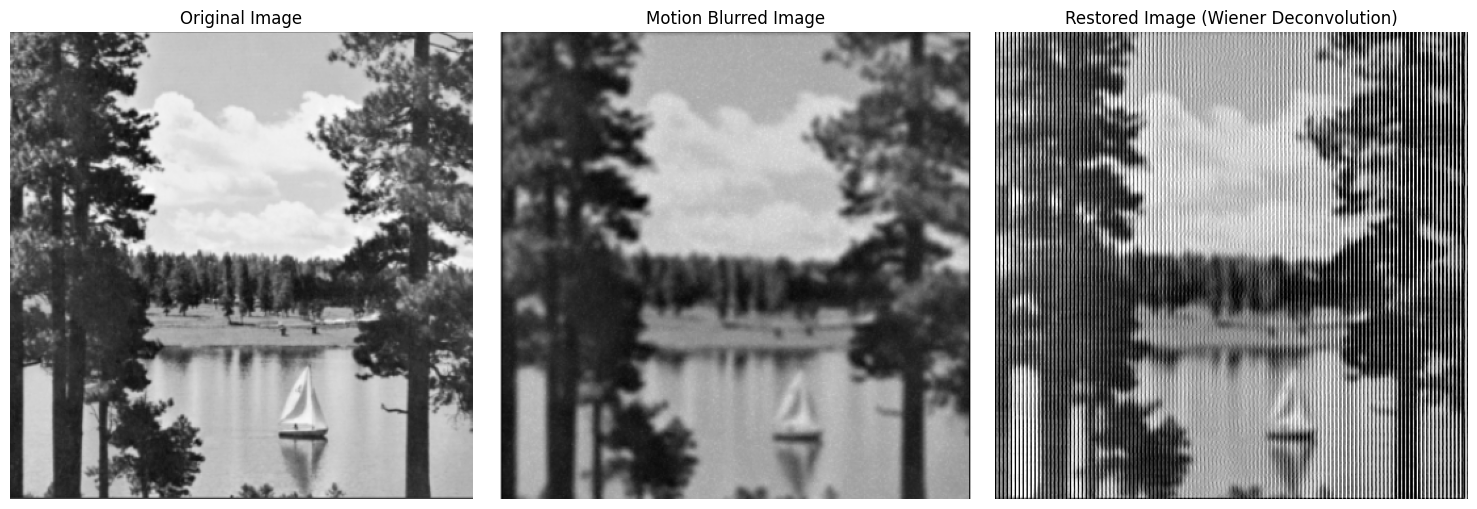

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from scipy.signal import wiener

notebook_dir = os.path.dirname(os.path.abspath('__file__'))

clear_image_filename = 'image_12_clear.jpeg'
blurry_image_filename = 'image_12_blurry.jpeg'

clear_image_path = os.path.join(notebook_dir, 'images', clear_image_filename)
clear_image = Image.open(clear_image_path)

blurry_image_path = os.path.join(notebook_dir, 'images', blurry_image_filename)
blurry_image = Image.open(blurry_image_path)

clear_image_array = np.array(clear_image)
blurry_image_array = np.array(blurry_image)

kernel_size2 = 3
motion_blur_kernel2 = np.zeros((kernel_size2, kernel_size2, blurry_image_array.shape[2]))
motion_blur_kernel2[int((kernel_size2 - 1) / 2), :, :] = np.ones((kernel_size2, blurry_image_array.shape[2]))
motion_blur_kernel2 /= kernel_size2

kernel_fft = np.fft.fft2(motion_blur_kernel2, s=blurry_image_array.shape[:2], axes=(0, 1))
blurred_fft = np.fft.fft2(blurry_image_array, axes=(0, 1))

blurred_psd = np.abs(blurred_fft) ** 2

noise_psd = np.mean(np.abs(blurred_fft) ** 2) / np.prod(blurry_image_array.shape[:2])

reg_param = 0.05
wiener_filter = np.conj(kernel_fft) / (np.abs(kernel_fft) ** 2 + reg_param * noise_psd / blurred_psd)

restored_fft = blurred_fft * wiener_filter
restored_image_array = np.fft.ifft2(restored_fft, axes=(0, 1)).real

restored_image_array = np.clip(restored_image_array, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(clear_image_array)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(blurry_image_array)
axes[1].set_title('Motion Blurred Image')
axes[1].axis('off')
axes[2].imshow(restored_image_array)
axes[2].set_title('Restored Image (Wiener Deconvolution)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


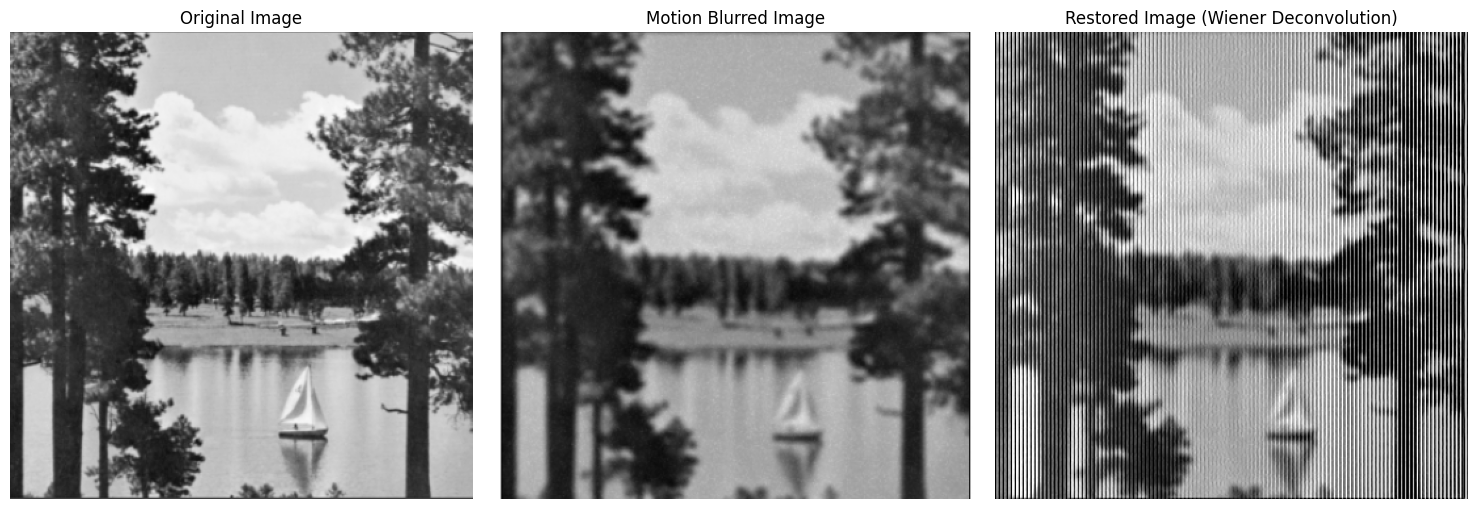

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from scipy.signal import wiener

notebook_dir = os.path.dirname(os.path.abspath('__file__'))

clear_image_filename = 'image_12_clear.jpeg'
blurry_image_filename = 'image_12_blurry.jpeg'

clear_image_path = os.path.join(notebook_dir, 'images', clear_image_filename)
clear_image = Image.open(clear_image_path)

blurry_image_path = os.path.join(notebook_dir, 'images', blurry_image_filename)
blurry_image = Image.open(blurry_image_path)

clear_image_array = np.array(clear_image)
blurry_image_array = np.array(blurry_image)

kernel_size2 = 3
motion_blur_kernel2 = np.zeros((kernel_size2, kernel_size2, blurry_image_array.shape[2]))
motion_blur_kernel2[int((kernel_size2 - 1) / 2), :, :] = np.ones((kernel_size2, blurry_image_array.shape[2]))
motion_blur_kernel2 /= kernel_size2

kernel_fft = np.fft.fft2(motion_blur_kernel2, s=blurry_image_array.shape[:2], axes=(0, 1))
blurred_fft = np.fft.fft2(blurry_image_array, axes=(0, 1))

blurred_psd = np.abs(blurred_fft) ** 2

noise_psd = np.mean(np.abs(blurred_fft) ** 2) / np.prod(blurry_image_array.shape[:2])

reg_param = 0.5
wiener_filter = np.conj(kernel_fft) / (np.abs(kernel_fft) ** 2 + reg_param * noise_psd / blurred_psd)

restored_fft = blurred_fft * wiener_filter
restored_image_array = np.fft.ifft2(restored_fft, axes=(0, 1)).real

restored_image_array = np.clip(restored_image_array, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(clear_image_array)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(blurry_image_array)
axes[1].set_title('Motion Blurred Image')
axes[1].axis('off')
axes[2].imshow(restored_image_array)
axes[2].set_title('Restored Image (Wiener Deconvolution)')
axes[2].axis('off')

plt.tight_layout()
plt.show()
